# Simple linear regression - CO2 emissions

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Data

In [5]:
# Download csv

# !wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

In [6]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


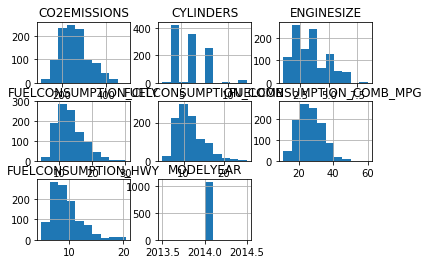

In [9]:
df.hist()
plt.show()

In [10]:
# plot values vs emission to look for correlations

In [11]:
data1 = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS']]

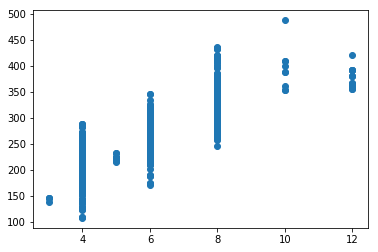

In [12]:
plt.scatter(data1['CYLINDERS'], data1['CO2EMISSIONS'])

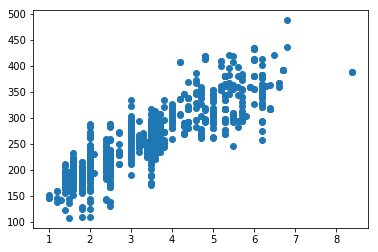

In [13]:
plt.scatter(data1['ENGINESIZE'], data1['CO2EMISSIONS'])

### Train/test split

In [15]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [16]:
# 80% training data

mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

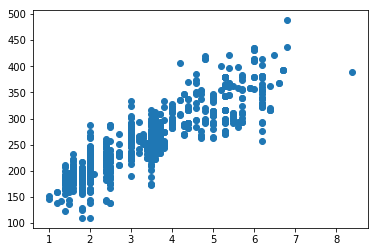

In [19]:
# check training data distribution

plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'])

### Model

Find out if engine size relates to co2 emissions

In [21]:
# import linear regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()

# create numpy arrays with training data for x and y
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# fit it
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

coefficients:  [[38.85147905]]
y-int:  [126.2228515]


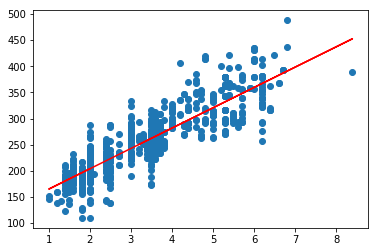

In [30]:
# see results. coefficient = slope of the line

print 'coefficients: ', regr.coef_
print 'y-int: ', regr.intercept_

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='red')
plt.show()

### Evaluation

In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 24.73
Residual sum of squares (MSE): 1074.67
R2-score: 0.64


MAE = Mean Absolute Error = mean of absolute value of errors
    -> the average prediction is off by 24.73 units

MSE = Mean Squared Error = mean of squared errors, more popular since it heavily weighs large errors
    -> the average of squared errors is 1074.67 units

R2 = Coefficient of Determination = what portion of total variation in Y is explained by variation in X? In other words, R squared is a normalized MSE (MSE is in original units while R squared is a fraction). Max is 1.0 and is negative when the line performs worse than a horizontal line